# **Exercise: Missing Values & Outliers**

Pada latihan kali ini, kita akan menggunakan beberapa metode yang telah kita pelajari:

- Imputing missing value
- Handling outliers
- Encoding
- Scaling
- Regularization
<br><br>

**Gunakan melb_data.csv (Melbourne House Data) dengan:**
- Features: 'Suburb', 'Rooms', 'Type', 'Method', 'Distance', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Regionname'
- Target: 'Price'

**Yang dilakukan pada preprocessing dan modeling:**
- Lakukan EDA secara sederhana untuk eksplorasi dataset.
- Hapus outliers jika ada.
- Splitting dataset dengan proporsi 80:20 dan random_state = 2020
- Gunakan ColumnTransformer untuk imputasi missing value dan encoding.
    - Ada 4 features yang mengandung missing value. Isi missing value tersebut dengan imputer yang menurut kamu paling sesuai dengan karakter masing-masing feature.
    - Ada 5 features categorical. Lakukan encoding pada features tersebut sesuai dengan karakter masing-masing feature.
- Lakukan Scaling pada numerical features. Pilih scaler yang menurut kamu paling sesuai berdasarkan karakteristik datanya.
- Lakukan prediksi dengan metode Lasso pada data preprocessed.



## **Import Libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## **Load & Explore Dataset**

In [3]:
pd.set_option('display.max_columns', 100)

In [4]:
df = pd.read_csv('melb_data.csv')
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [5]:
df = df[['Suburb','Rooms','Type','Method','Distance','Bedroom2','Bathroom','Car','Landsize',
            'BuildingArea','YearBuilt','CouncilArea','Regionname','Price']]

In [6]:
df.shape

(13580, 14)

In [7]:
df.describe()

,Rooms,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Price
count,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,1.358000e+04
mean,2.937997,10.137776,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,1.075684e+06
std,0.955748,5.868725,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,6.393107e+05
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,8.500000e+04
25%,2.000000,6.100000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,6.500000e+05
50%,3.000000,9.200000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,9.030000e+05
75%,3.000000,13.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,1.330000e+06
max,10.000000,48.100000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,9.000000e+06


In [8]:
df.describe(include='object')

,Suburb,Type,Method,CouncilArea,Regionname
count,13580,13580,13580,12211,13580
unique,314,3,5,33,8
top,Reservoir,h,S,Moreland,Southern Metropolitan
freq,359,9449,9022,1163,4695


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Suburb        13580 non-null  object 
 1   Rooms         13580 non-null  int64  
 2   Type          13580 non-null  object 
 3   Method        13580 non-null  object 
 4   Distance      13580 non-null  float64
 5   Bedroom2      13580 non-null  float64
 6   Bathroom      13580 non-null  float64
 7   Car           13518 non-null  float64
 8   Landsize      13580 non-null  float64
 9   BuildingArea  7130 non-null   float64
 10  YearBuilt     8205 non-null   float64
 11  CouncilArea   12211 non-null  object 
 12  Regionname    13580 non-null  object 
 13  Price         13580 non-null  float64
dtypes: float64(8), int64(1), object(5)
memory usage: 1.5+ MB


In [10]:
df.select_dtypes('object').head()

,Suburb,Type,Method,CouncilArea,Regionname
0,Abbotsford,h,S,Yarra,Northern Metropolitan
1,Abbotsford,h,S,Yarra,Northern Metropolitan
2,Abbotsford,h,SP,Yarra,Northern Metropolitan
3,Abbotsford,h,PI,Yarra,Northern Metropolitan
4,Abbotsford,h,VB,Yarra,Northern Metropolitan


### **Simple EDA**

In [11]:
# categorical features
cat_features = [feature for feature in df.columns if ((df[feature].dtypes == 'O') & (feature not in ['Suburb']))]
cat_features

['Type', 'Method', 'CouncilArea', 'Regionname']

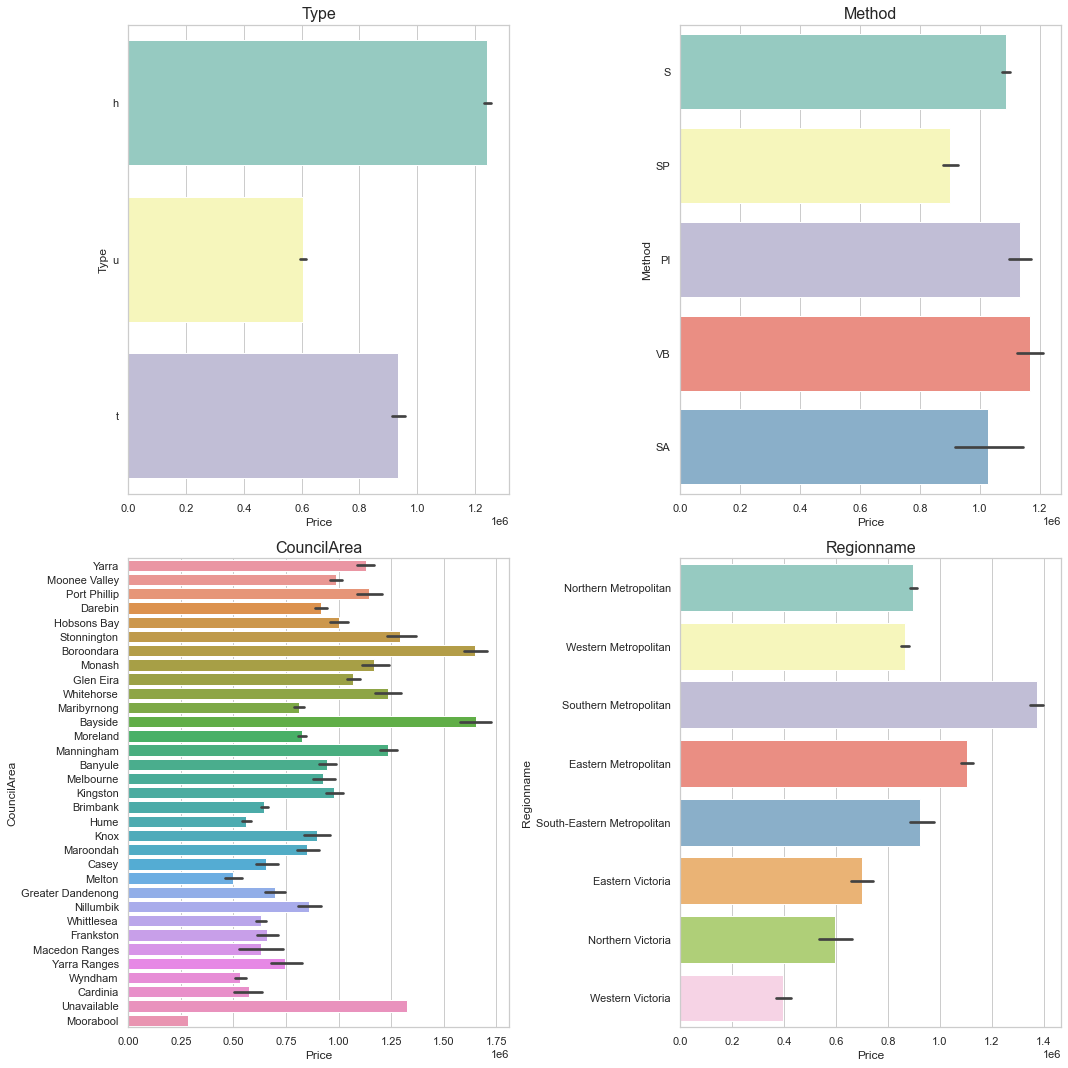

In [12]:
# Harga rumah berdasarkan tiap categorical feature

plt.figure(figsize=(15, 15), facecolor='white')
sns.set(style='whitegrid', palette='Set3')
plotnumber = 1

for feature in cat_features:
    # subplot (letak grafik)
    ax = plt.subplot(2, 2, plotnumber)
    
    # Harga rumah berdasarkan feature 
    sns.barplot(x = 'Price', y = feature, data = df)
    
    plt.xlabel('Price')
    plt.ylabel(feature)
    plt.title(feature, fontsize=16)
    plt.tight_layout();
    
    plotnumber += 1

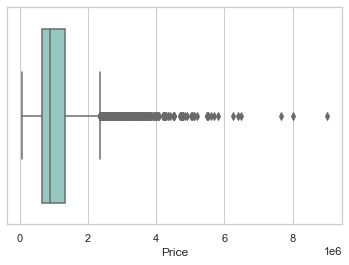

In [13]:
# Distribusi Harga Rumah
sns.boxplot(x='Price', data=df);

In [14]:
# Numerical Features
num_feature = [fea for fea in df.describe().columns]
num_feature

['Rooms',
 'Distance',
 'Bedroom2',
 'Bathroom',
 'Car',
 'Landsize',
 'BuildingArea',
 'YearBuilt',
 'Price']

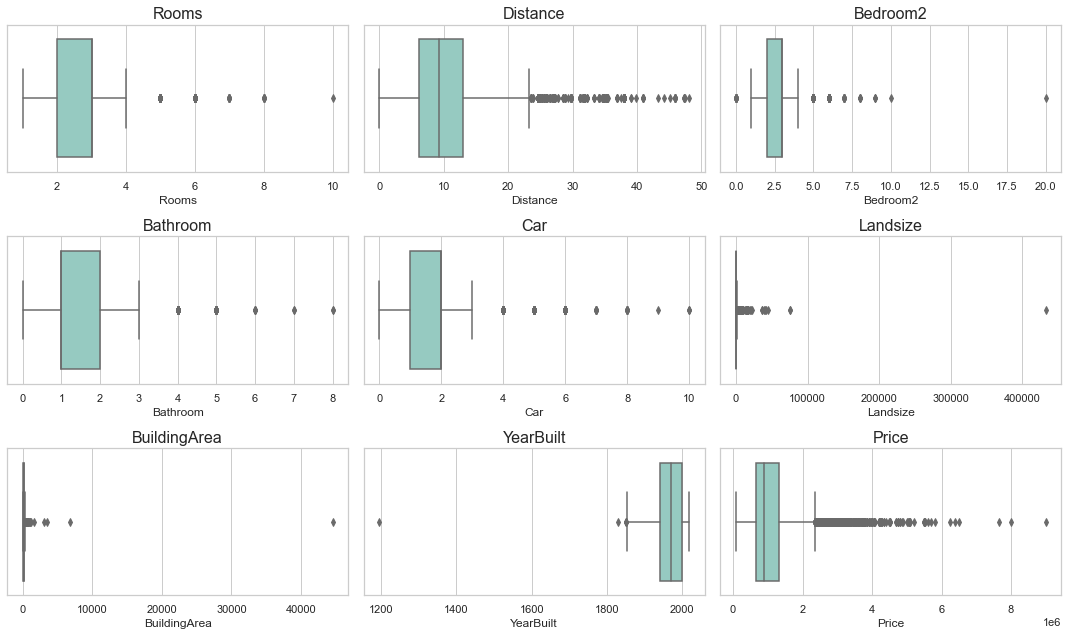

In [15]:
plt.figure(figsize=(15, 9), facecolor='white')
sns.set(style='whitegrid', palette='Set3')
plotnumber = 1
    
for feature in num_feature:
    ax = plt.subplot(3,3, plotnumber)
    sns.boxplot(x=feature, data=df);
    plt.title(feature, fontsize=16)
    plt.tight_layout()
    plotnumber += 1


In [16]:
# Outliers
outliers = df[(df['Bedroom2'] > 10) | (df['Landsize'] > 100000) | (df['BuildingArea'] > 10000) | (df['YearBuilt'] < 1800) ]
outliers

,Suburb,Rooms,Type,Method,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Regionname,Price
7404,Caulfield East,3,h,PI,9.3,20.0,1.0,2.0,875.0,NaN,NaN,Glen Eira,Southern Metropolitan,1650000.0
9968,Mount Waverley,3,h,VB,14.2,3.0,1.0,4.0,807.0,117.0,1196.0,Monash,Eastern Metropolitan,1200000.0
11020,Fitzroy,3,h,VB,2.1,3.0,3.0,1.0,433014.0,NaN,NaN,Yarra,Northern Metropolitan,2700000.0
13245,New Gisborne,5,h,S,48.1,5.0,3.0,5.0,44500.0,44515.0,NaN,NaN,Northern Victoria,1355000.0


In [17]:
# df = df.drop(outliers.index, axis=0)

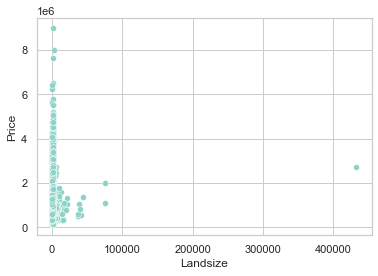

In [18]:
# Price vs Landsize
sns.scatterplot(x='Landsize', y='Price', data=df);

In [19]:
# Outlier pada Landsize
df[df['Landsize'] > 400000]

,Suburb,Rooms,Type,Method,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Regionname,Price
11020,Fitzroy,3,h,VB,2.1,3.0,3.0,1.0,433014.0,NaN,NaN,Yarra,Northern Metropolitan,2700000.0


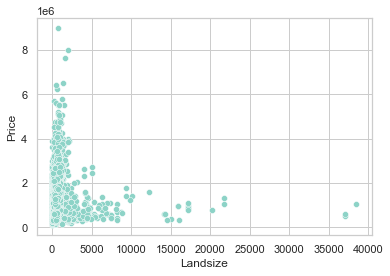

In [20]:
sns.scatterplot(x='Landsize', y='Price', data=df[df['Landsize'] < 40000]);

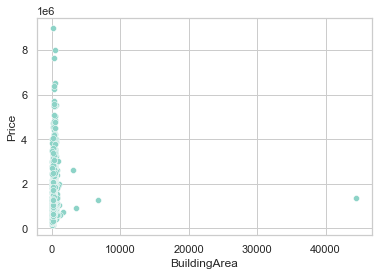

In [21]:
# Building Area vs Price
sns.scatterplot(x='BuildingArea', y='Price', data=df);

In [22]:
# Outlier
df[df['BuildingArea'] > 40000]

,Suburb,Rooms,Type,Method,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Regionname,Price
13245,New Gisborne,5,h,S,48.1,5.0,3.0,5.0,44500.0,44515.0,NaN,NaN,Northern Victoria,1355000.0


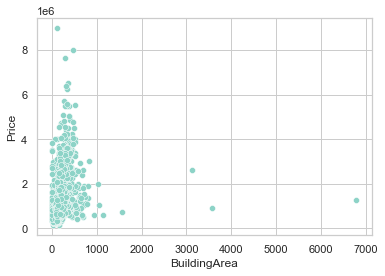

In [23]:
sns.scatterplot(x='BuildingArea', y='Price', data=df[df['BuildingArea'] < 40000]);

In [24]:
df.isna().sum()

Suburb             0
Rooms              0
Type               0
Method             0
Distance           0
Bedroom2           0
Bathroom           0
Car               62
Landsize           0
BuildingArea    6450
YearBuilt       5375
CouncilArea     1369
Regionname         0
Price              0
dtype: int64

In [25]:
# Check correlation to the target
df.corr()['Price']

Rooms           0.496634
Distance       -0.162522
Bedroom2        0.475951
Bathroom        0.467038
Car             0.238979
Landsize        0.037507
BuildingArea    0.090981
YearBuilt      -0.323617
Price           1.000000
Name: Price, dtype: float64

## **Load Data**

In [180]:
# Import Libraries
from sklearn.experimental import enable_iterative_imputer 
from sklearn.impute import IterativeImputer
from sklearn.impute import SimpleImputer

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer # untuk transformers
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
import category_encoders as ce # untuk ordinal dan binary encoder
from sklearn.preprocessing import RobustScaler

In [181]:
df = pd.read_csv('melb_data.csv')

df = df[['Suburb','Rooms','Type','Method','Distance','Bedroom2','Bathroom','Car','Landsize',
         'BuildingArea','YearBuilt','CouncilArea','Regionname','Price']]
         
df.head()

,Suburb,Rooms,Type,Method,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Regionname,Price
0,Abbotsford,2,h,S,2.5,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,Northern Metropolitan,1480000.0
1,Abbotsford,2,h,S,2.5,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,Northern Metropolitan,1035000.0
2,Abbotsford,3,h,SP,2.5,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,Northern Metropolitan,1465000.0
3,Abbotsford,3,h,PI,2.5,3.0,2.0,1.0,94.0,NaN,NaN,Yarra,Northern Metropolitan,850000.0
4,Abbotsford,4,h,VB,2.5,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra,Northern Metropolitan,1600000.0


## **Drop Outliers**

In [182]:
def outliers(col):

    q3 = col.describe().loc['75%']
    q1 = col.describe().loc['25%']

    iqr = q3-q1

    upper = q3 + 1.5*iqr
    lower = q1 - 1.5*iqr

    print('Upper fence: ', upper)
    print('Lower fence: ', lower)

In [183]:
for i in list(df.describe()):
    print(i)
    outliers(df[i])

Rooms
Upper fence:  4.5
Lower fence:  0.5
Distance
Upper fence:  23.35
Lower fence:  -4.250000000000002
Bedroom2
Upper fence:  4.5
Lower fence:  0.5
Bathroom
Upper fence:  3.5
Lower fence:  -0.5
Car
Upper fence:  3.5
Lower fence:  -0.5
Landsize
Upper fence:  1362.0
Lower fence:  -534.0
BuildingArea
Upper fence:  295.5
Lower fence:  -28.5
YearBuilt
Upper fence:  2087.5
Lower fence:  1851.5
Price
Upper fence:  2350000.0
Lower fence:  -370000.0


In [184]:
df.shape

(13580, 14)

In [185]:
# df.describe()

In [186]:
df[df['BuildingArea']<=295.5].shape

(6777, 14)

In [187]:
df[df['BuildingArea']>295.5].shape


(353, 14)

In [188]:
df[df['BuildingArea'].isna()].shape

(6450, 14)

In [190]:
df = df[(df['Rooms'] >= 0.5) & (df['Rooms'] <= 4.5)]
print(df.shape)

df = df[(df['Distance'] >= 0) & (df['Distance'] <= 23.35)]
print(df.shape)

df = df[(df['Bedroom2'] >= 0.5) & (df['Bedroom2'] <= 4.5)]
print(df.shape)

df = df[(df['Bathroom'] >= 0) & (df['Bathroom'] <= 3.5)]
print(df.shape)

df = df[(df['Car'] >= 0) & (df['Car'] <= 3.5) | (df['Car'].isna())]
print(df.shape)

df = df[(df['Landsize'] >= 0) & (df['Landsize'] <= 1362)]
print(df.shape)

df = df[(df['BuildingArea'] >= 0) & (df['BuildingArea'] <= 295.5) | (df['BuildingArea'].isna())]
print(df.shape)

df = df[(df['YearBuilt'] >= 1851) & (df['YearBuilt'] <= 2087) | (df['YearBuilt'].isna())]
print(df.shape)

df = df[(df['Price'] >= 0.5) & (df['Price'] <= 2350000)]
print(df.shape)

(12898, 14)
(12510, 14)
(12470, 14)
(12423, 14)
(11934, 14)
(11615, 14)
(11450, 14)
(11446, 14)
(11125, 14)


## **Data Splitting**

In [191]:
# Define X and y
X = df[['Suburb', 'Rooms', 'Type', 'Method', 'Distance', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Regionname']]
y = df['Price']

In [192]:
# Splitting
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y,
    test_size=0.2,
    random_state=2020
)

## **Data Transform**

### Imputing missing value
- SimpleImputer: most_frequent untuk 'CouncilArea'
- Iterative imputer: 'Car','BuildingArea','YearBuilt'

### Encoding:
- Binary Encoding : 'Suburb', 'CouncilArea', 'Regionname'
- Onehot Encoding : 'Type', 'Method'

### Scaling:
- RobustScaler() karena terdapat banyak outliers

In [193]:
# df.describe().T

In [194]:
# df.describe(include='object').T

### Check Missing Values

In [195]:
df.isna().sum() / df.shape[0]*100

Suburb           0.000000
Rooms            0.000000
Type             0.000000
Method           0.000000
Distance         0.000000
Bedroom2         0.000000
Bathroom         0.000000
Car              0.485393
Landsize         0.000000
BuildingArea    48.314607
YearBuilt       39.847191
CouncilArea      8.925843
Regionname       0.000000
Price            0.000000
dtype: float64

In [196]:
# Binary & Simple imputer (mode)
mode_binary = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('binary', ce.BinaryEncoder())
])

# Encoding
transformer = ColumnTransformer([
    ('imp_iter', IterativeImputer(), ['Car','BuildingArea','YearBuilt']),
    ('onehot', OneHotEncoder(drop='first'), ['Type','Method']),
    ('binary', ce.BinaryEncoder(), ['Suburb','Regionname']),
    ('mode_binary', mode_binary, ['CouncilArea'])
], remainder='passthrough')

In [197]:
# .fit and .transform method
X_train_prep = transformer.fit_transform(X_train) 

# .transform method
X_test_prep = transformer.transform(X_test) 

## **Scaling**

In [198]:
# Scaling
scaler = RobustScaler()

X_train_prep_scaled = scaler.fit_transform(X_train_prep)
X_test_prep_scaled = scaler.transform(X_test_prep)

In [199]:
X_train_prep_scaled = pd.DataFrame(X_train_prep_scaled)
X_test_prep_scaled = pd.DataFrame(X_test_prep_scaled)

X_train_prep_scaled.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32
0,0.0,-0.303399,-0.526316,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,1.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.313433,0.0,0.0,-0.181223
1,1.0,0.747268,0.039739,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,1.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.0,0.313433,0.0,1.0,-0.216157
2,0.0,-0.074913,-0.526316,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,1.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.014925,1.0,1.0,0.700873
3,1.0,0.628844,2.210526,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,1.0,1.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.104478,0.0,0.0,-0.419214
4,-1.0,-0.939460,-0.315789,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,1.0,0.0,0.0,-1.0,-0.253731,-1.0,0.0,0.986900


In [200]:
# menyatukan nama-nama features

# features = list(transformer.transformers_[0][1].get_feature_names()) + list(transformer.transformers_[1][1].get_feature_names()) + list(X_train.columns[transformer.transformers_[2][2]])

# X_train_prep_scaled.columns = features
# X_test_prep_scaled.columns = features

# X_test_prep_scaled

## **Find the best alpha**


In [201]:
# Import Libraries
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_squared_error

In [202]:
# Lasso

alpha = [100000, 10000, 1000, 100, 10, 1, 0.1, 0.01, 0.001, 0.0000001]
training_rmse = []
testing_rmse = []

score = 0

for i in range(len(alpha)):
    lasso = Lasso(alpha=alpha[i])
    lasso.fit(X_train_prep_scaled, y_train)
    
    y_predict_train = lasso.predict(X_train_prep_scaled)
    rmse_train = mean_squared_error(y_train, y_predict_train)**0.5
    training_rmse.append(rmse_train)
    
    y_predict_test = lasso.predict(X_test_prep_scaled)
    rmse_score = mean_squared_error(y_test, y_predict_test)**0.5
    testing_rmse.append(rmse_score)
    
    if i==0:
        score = rmse_score
        best_alpha = alpha[i]
        
    if score > rmse_score:
        score = rmse_score
        best_alpha = alpha[i]

In [203]:
print('Best alpha', best_alpha)
print('RMSE', score)

# print('Training RMSE:', training_rmse)
# print('Testing RMSE:', testing_rmse)


Best alpha 1000
RMSE 268916.2769542985


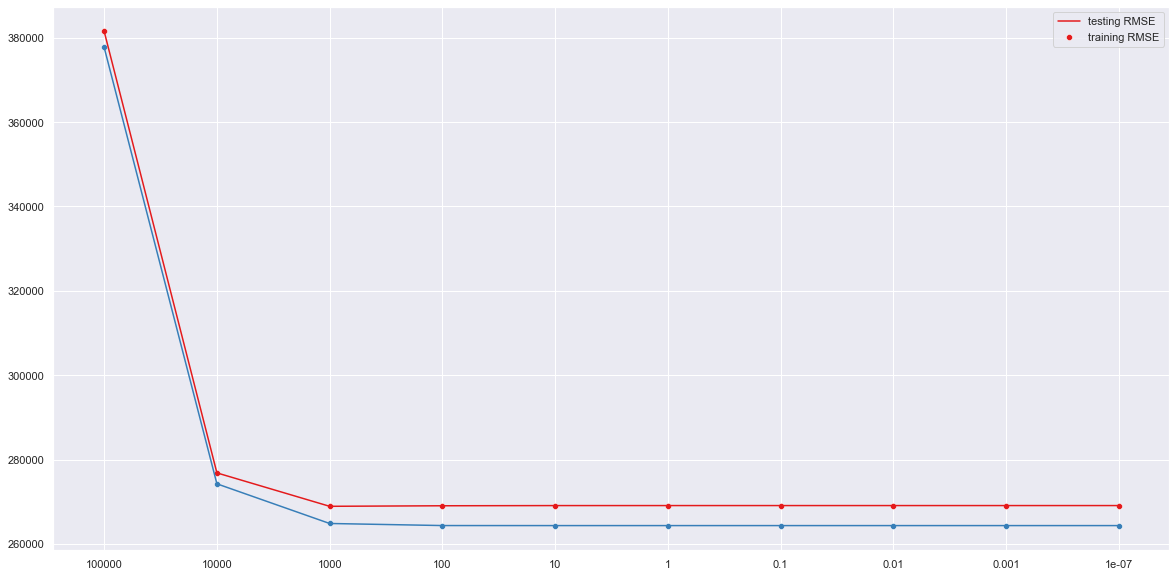

In [204]:
# Plot the alphas
sns.set(palette='Set1')
length = range(len(alpha))

plt.figure(figsize = (20,10))

sns.lineplot(length, testing_rmse)
sns.scatterplot(length, testing_rmse)

sns.lineplot(length,training_rmse)
sns.scatterplot(length, training_rmse)

plt.legend(['testing RMSE', 'training RMSE'])
plt.xticks(length, alpha);

In [205]:
pd.DataFrame(
    {
    'alpha': alpha,
    'train RMSE': training_rmse,
    'test RMSE': testing_rmse
    }
)

,alpha,train RMSE,test RMSE
0,1.000000e+05,377693.936337,381497.118758
1,1.000000e+04,274246.593379,276837.608574
2,1.000000e+03,264843.978915,268916.276954
3,1.000000e+02,264352.226135,269043.608477
4,1.000000e+01,264343.989643,269087.393620
5,1.000000e+00,264343.886241,269090.452589
6,1.000000e-01,264343.885207,269090.768585
7,1.000000e-02,264343.885197,269090.800287
8,1.000000e-03,264343.885197,269090.803458
9,1.000000e-07,264343.885197,269090.803810


### **Interpretasi**

Dari alpha 1 sampai 0.00001, nilai RMSE untuk train dan test set sudah tidak terlalu berubah signifikan. Jadi, untuk kasus kali ini digunakan alpha=100 saja.

## **Modeling**

In [209]:
# Model
model = Lasso(alpha=100)

# Model training
model.fit(X_train_prep_scaled, y_train)

# Model predicting test set  
y_pred = model.predict(X_test_prep_scaled)

# Metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print('MSE:', mse)
print('RMSE:', rmse)

MSE: 72384463262.14688
RMSE: 269043.6084766685


### **Model Properties**

In [210]:
model_coef = pd.DataFrame({
    'feature': list(X_train_prep_scaled),
    'coef': model.coef_
}).sort_values('coef')

model_coef

,feature,coef
21,21,-339365.541061
4,4,-334983.958664
29,29,-261464.099282
3,3,-132451.864680
19,19,-87094.915131
17,17,-60161.567787
2,2,-40379.034639
26,26,-34083.984127
20,20,-32050.959795
15,15,-17074.436208


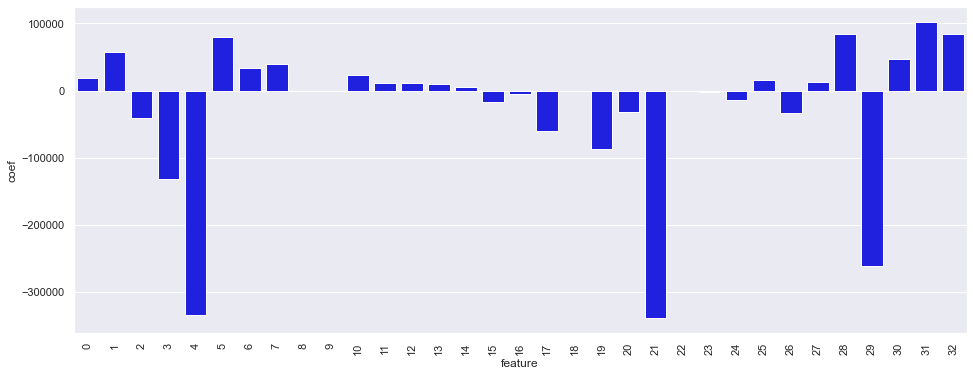

In [211]:
plt.figure(figsize=(16,6))
sns.barplot(data=model_coef, x='feature', y='coef', color='b')
plt.xticks(rotation=90)
plt.show()